### Importation du dataset dans le clood

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Importation des packages

In [18]:
from keras.applications.inception_v3 import InceptionV3,preprocess_input,decode_predictions
from keras.preprocessing import image
import numpy as np
from keras.layers import Dense, GlobalAveragePooling2D,Dropout,Input
# from keras.layers.advanced_activations import LeakyReLU, ELU
from keras.models import Sequential,Model
from keras import backend as K
from IPython.display import display

loaded model


### Chargement du modele et Pretraitement des données

In [0]:
base_model  = InceptionV3(weights = 'imagenet', include_top=False)
print('loaded model')

#Définir le dictionnaire pour le générateur de données d'image
data_gen_args = dict(preprocessing_function=preprocess_input, 
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip = True)

train_datagen = image.ImageDataGenerator(**data_gen_args)
test_datagen = image.ImageDataGenerator(**data_gen_args)

### Chargement des données d'entrainement et de validation (test)

In [21]:
train_generator = train_datagen.flow_from_directory("gdrive/My Drive/Colab Notebooks/base/train",
                                                    target_size=(299,299),batch_size=32)

valid_generator = test_datagen.flow_from_directory("gdrive/My Drive/Colab Notebooks/base/valid",
                                                     target_size=(299,299),batch_size=32)

Found 767 images belonging to 5 classes.
Found 64 images belonging to 5 classes.


### Création du modele CNN

In [27]:
model = Sequential()

# Premiere couche (couche d'entree)
model.add(Conv2D(filters=4, kernel_size=2, padding='same',
                 activation='relu', input_shape=(299, 299, 3)))
model.add(MaxPooling2D(pool_size=2))

# Deuxieme couche
model.add(Conv2D(filters=8, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.1))

# Troisieme couche
model.add(Conv2D(filters=12, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

# Quatrieme couche
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

# Cinquieme couche
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))

# Sixieme couche (couche de sortie/classification)
model.add(Dense(5, activation='softmax')) 


model.summary()

# Compilation du modele avant l'entrainement
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_103 (Conv2D)          (None, 299, 299, 4)       52        
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 149, 149, 4)       0         
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 149, 149, 8)       136       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 74, 74, 8)         0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 74, 74, 8)         0         
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 74, 74, 12)        396       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 37, 37, 12)        0         
__________

### Arrêter la formation et sauvegarder le modele avec les meilleurs poids

In [0]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

# Sauvegarder le modèle avec les meilleurs poids
checkpointer = ModelCheckpoint('gdrive/My Drive/Colab Notebooks/saved_model/benchmark.hdf5', verbose=1,save_best_only=True)

# Arrêtez la formation si le modèle ne montre aucune amélioration 
stopper = EarlyStopping(monitor='val_loss',min_delta=0.1,patience=0,verbose=1,mode='auto')

### Apprentissage du modele

In [39]:
history_model = model.fit_generator(train_generator, steps_per_epoch = 13,
                                    validation_data=valid_generator,
                                    validation_steps=3, 
                                    epochs=30,verbose=1,
                                    callbacks=[checkpointer])

Epoch 1/30
13/13 [==============================] - 17s 1s/step - loss: 0.1219 - acc: 0.9567 - val_loss: 0.0673 - val_acc: 0.9896

Epoch 00001: val_loss improved from 0.08666 to 0.06732, saving model to gdrive/My Drive/Colab Notebooks/saved_model/benchmark.hdf5
Epoch 2/30
13/13 [==============================] - 14s 1s/step - loss: 0.1380 - acc: 0.9471 - val_loss: 0.0564 - val_acc: 1.0000

Epoch 00002: val_loss improved from 0.06732 to 0.05642, saving model to gdrive/My Drive/Colab Notebooks/saved_model/benchmark.hdf5
Epoch 3/30
13/13 [==============================] - 13s 1s/step - loss: 0.0833 - acc: 0.9808 - val_loss: 0.0888 - val_acc: 0.9583

Epoch 00003: val_loss did not improve from 0.05642
Epoch 4/30
13/13 [==============================] - 14s 1s/step - loss: 0.0840 - acc: 0.9615 - val_loss: 0.0539 - val_acc: 0.9792

Epoch 00004: val_loss improved from 0.05642 to 0.05394, saving model to gdrive/My Drive/Colab Notebooks/saved_model/benchmark.hdf5
Epoch 5/30
13/13 [==============

### Afficher l'historique d'apprentissage ainsi que les poids

In [40]:
display(history_model.history)

{'acc': [0.9566265060240964,
  0.9471153846153846,
  0.980722891566265,
  0.9615384615384616,
  0.9542168656027461,
  0.9711538461538461,
  0.980722891566265,
  0.9591346153846154,
  0.9807228894118803,
  0.9591346153846154,
  0.9734939759036144,
  0.9638554219739983,
  0.9855769230769231,
  0.963855421686747,
  0.9831730769230769,
  0.9831325279660972,
  0.9711538461538461,
  0.985542166520314,
  0.9807692307692307,
  0.9903614457831326,
  0.9663461538461539,
  0.983132530120482,
  0.9710843374930233,
  0.9903846153846154,
  0.9566265063113477,
  0.9927884615384616,
  0.987951805074531,
  0.9879807692307693,
  0.9855421686746988,
  0.9903846153846154],
 'loss': [0.12202887353767831,
  0.13802603288338736,
  0.08330564777176064,
  0.08395432996062133,
  0.1381638615964407,
  0.06689183686215144,
  0.07478212029280433,
  0.08771990453645301,
  0.06031883362546025,
  0.10117386983564267,
  0.06716361020927329,
  0.10446442950920887,
  0.03983496922032478,
  0.0740799284484013,
  0.054714

### Afficher la courbe d'apprentissage

In [0]:
def plot_training(history):
    acc = history_model.history['acc'] 
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs  = range(len(acc))
    
    plt.plot(epochs,acc,'b')
    plt.plot(epochs,val_acc,'r')
    plt.title("Précision de formation et de validation")
    
    plt.figure()
    plt.plot(epochs,loss,'b')
    plt.plot(epochs,val_loss,'r')
    plt.title("Perte de formation et de validation")
    
    plt.show()

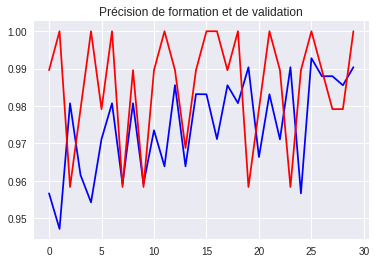

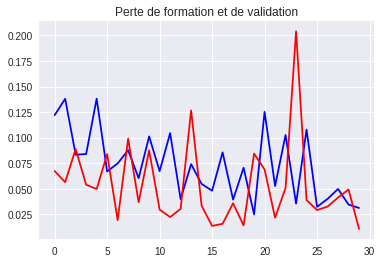

In [68]:
plot_training(history_model)

### Chargement du modele entrainé et prédiction

In [0]:

# Chargez les poids à partir du modèle affiné
model.load_weights('gdrive/My Drive/Colab Notebooks/saved_model/benchmark.hdf5')

In [0]:
from keras.preprocessing.image import img_to_array,load_img
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
def pred(img_path):    
    img = load_img(img_path,target_size = (299,299)) #Chargez l'image et réglez la taille cible sur la taille d'entrée de notre modèle
    x = img_to_array(img) # Convertir l'image en tableau
    x = np.expand_dims(x,axis=0) # Convertir le tableau à la forme (1, x, y, z)
    x = preprocess_input(x) # Utiliser la fonction d’entrée de prétraitement o soustraire la moyenne de toutes les images
    p = np.argmax(model.predict(x)) # Stocke l'argmax des prédictions
    if p==0:     # Si P=0 (Stop) , P=1 (Tourner a gauche) , P=2 (Tourner a droite) , P=3 (Quarante Km/h) , P=4 (Arrêt)
        print("STOP")
    elif p==1:
        print("TOURNER À GAUCHE")
    elif p==2:
        print("TOURNER À DROITE")
    elif p==3:
        print("QUARANTE KM/H")
    elif p==4:
        print("ARRÊT")

### Résultats de la prédiction avec les nouvelles images

ARRÊT


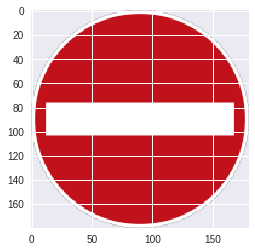

In [55]:
pred("gdrive/My Drive/Colab Notebooks/1.png")
z = plt.imread('gdrive/My Drive/Colab Notebooks/1.png') 
plt.imshow(z);  

QUARANTE KM/H


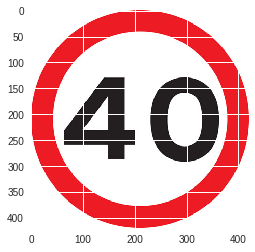

In [61]:
pred("gdrive/My Drive/Colab Notebooks/q.jpg")
z = plt.imread('gdrive/My Drive/Colab Notebooks/q.jpg') 
plt.imshow(z); 

QUARANTE KM/H


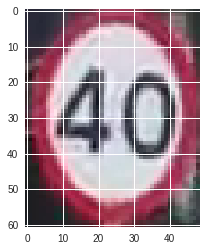

In [65]:
pred("gdrive/My Drive/Colab Notebooks/test/q2.png")
z = plt.imread('gdrive/My Drive/Colab Notebooks/test/q2.png') 
plt.imshow(z);

TOURNER À DROITE


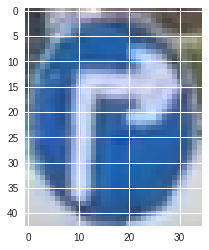

In [62]:
pred("gdrive/My Drive/Colab Notebooks/test/td2.png")
z = plt.imread('gdrive/My Drive/Colab Notebooks/test/td2.png') 
plt.imshow(z);

TOURNER À GAUCHE


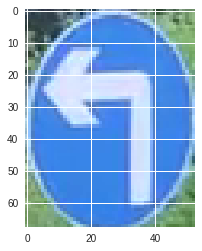

In [63]:
pred("gdrive/My Drive/Colab Notebooks/test/tg2.png")
z = plt.imread('gdrive/My Drive/Colab Notebooks/test/tg2.png') 
plt.imshow(z); 

STOP


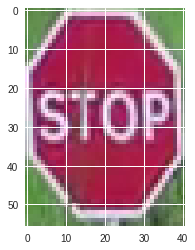

In [66]:
pred("gdrive/My Drive/Colab Notebooks/test/st2.png")
z = plt.imread('gdrive/My Drive/Colab Notebooks/test/st2.png') 
plt.imshow(z);

STOP


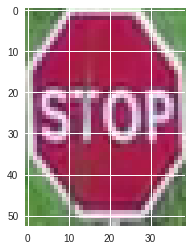

In [67]:
pred("gdrive/My Drive/Colab Notebooks/test/st1.png")
z = plt.imread('gdrive/My Drive/Colab Notebooks/test/st1.png') 
plt.imshow(z);